In [1]:
from google.colab import files
a=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.drop(['CustomerId','Surname','RowNumber'],axis=1, inplace=True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
#label encode object data types

data_types_dict=dict(data.dtypes)
#keep track mapping column name to Label Encoder
label_encoder_collection= {}
for col_name, data_type in data_types_dict.items():
  if data_type=='object':
    le=LabelEncoder()
    data[col_name]=le.fit_transform(data[col_name])
    label_encoder_collection[col_name]=le

    

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [15]:
x=data.iloc[:,:-1].values.astype(np.float32)
y=data.iloc[:,-1].values.astype(int)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# Building Neural Network

In [18]:
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=10,))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
#Final sigmoid layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


# Creating Optimizer And Compiling The Model

In [20]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
250/250 [==============================] - 0s 2ms/step - loss: 170.3052 - accuracy: 0.6750 - val_loss: 266.2347 - val_accuracy: 0.6265
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 161.6008 - accuracy: 0.6839 - val_loss: 318.1567 - val_accuracy: 0.8020
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 169.0801 - accuracy: 0.6798 - val_loss: 135.3801 - val_accuracy: 0.8020
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 159.4071 - accuracy: 0.6821 - val_loss: 63.3830 - val_accuracy: 0.8020
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 144.8998 - accuracy: 0.6766 - val_loss: 43.3621 - val_accuracy: 0.5390
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 130.5532 - accuracy: 0.6914 - val_loss: 238.6740 - val_accuracy: 0.6045
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 145.1000 - accuracy: 0.6725 - val_loss: 136.3086 - v

# Visualization of performance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<function matplotlib.pyplot.show>

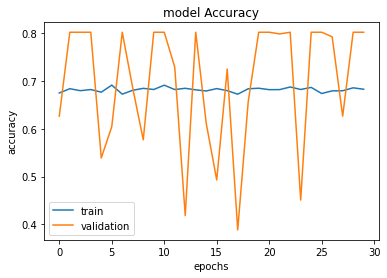

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')
plt.show


# Loss Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<function matplotlib.pyplot.show>

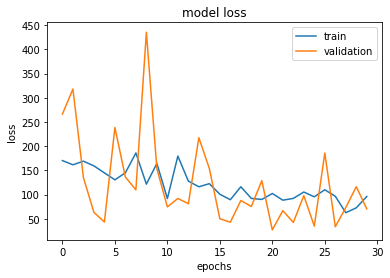

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')
plt.show

In [26]:
predictions=np.round(model.predict(x_test))

In [27]:
#checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,predictions)

0.802

In [28]:
confusion_matrix(y_test,predictions)

array([[1604,    0],
       [ 396,    0]])